* 確認動機和分析的目的
* 尋找適當資料集集描述該資料
* 分析資料過程
* 分析結果解釋


### 資料來源: PTT八卦版
### 時間:2023-03-17 ~ 2023/04/19
### 關鍵字:多慧、李多慧、多惠、李多惠 

![多慧可愛](S__38879276.jpg)

In [1]:
import jieba
import jieba.analyse
import pandas as pd
from PIL import Image,ImageSequence
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import math
import matplotlib.pyplot as plt 
import re
import numpy as np
from nltk import ngrams
from nltk import FreqDist
from collections import Counter, namedtuple
import networkx as nx
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from numpy.linalg import norm

In [2]:
# 設定圖的字體
#plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
from matplotlib.font_manager import FontProperties
myfont =  FontProperties(fname = r'C:\Users\user\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\SimHei.ttf')
plt.rcParams['font.sans-serif']=['SimHei']
fprop = fm.FontProperties(fname="./SourceHanSansTW-Regular.otf")
fprop

plt.rcParams['font.size'] = 14
#plt.rcParams['font.sans-serif'] = ['Noto Sans TC']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('./data/PTT_post.csv').dropna(axis=0, how='any')
#去掉NA
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊--樂天女孩了！\nhttps://i....,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1679017272....,Re:[問卦]李多惠LeeDaHye是最頂的啦啦隊嗎？,2023-03-17 09:41:09,Borges,Gossiping,!!!!!震撼彈!!!!!\n最頂的啦啦隊員\n要來台灣加入最頂的啦啦隊 樂天女孩啦\nht...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PTTfaggot"", ...",42.79.182.238,2023-03-18 01:37:09,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1679018867....,[問卦]李多慧屌打林襄嗎？,2023-03-17 10:07:45,akanishiking,Gossiping,棒球版看到\n\n韓國職棒最紅啦啦隊員李多惠被自家球隊啦啦隊以因為比球員紅 蓋過球員的焦點的...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""love0504"", ""...",122.99.25.54,2023-03-18 01:37:50,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1679019363....,[新聞]重磅加盟！韓國啦啦隊女神李多慧加入樂天,2023-03-17 10:16:01,joanzkow,Gossiping,備註請放最後面 違者新聞文章刪除\n\n1.媒體來源:\nETTODAY\n\n2.記者署名...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""coffee112"", ...",123.192.240.141,2023-03-18 01:38:11,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1679019603....,Re:[新聞]重磅加盟！韓國啦啦隊女神李多慧加入樂天,2023-03-17 10:20:01,ps124125288,Gossiping,這樣子做就對了嘛\n\n早就說過了，中華職棒的本體是啦啦隊\n\n球隊有勝有敗，但是只有啦啦...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""palapalanhu""...",1.200.104.236,2023-03-18 01:38:32,ptt
...,...,...,...,...,...,...,...,...,...,...,...
580,581,https://www.ptt.cc/bbs/Gossiping/M.1681894646....,[問卦]李多慧來台，韓網也懂了老人健康操,2023-04-19 16:57:24,ReiKuromiya,Gossiping,https://i.imgur.com/TahmdjW.jpg\n招募李多慧後樂天官方You...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""s820912gmail...",101.10.56.69,2023-04-20 01:31:47,ptt
581,582,https://www.ptt.cc/bbs/Gossiping/M.1681906106....,[問卦]下次經典賽可以徵召李多慧嗎,2023-04-19 20:08:24,thewtf,Gossiping,我老婆加入台灣職棒啦啦隊後\n造成全台灣噁男和台男成為她的粉絲\n讓大家看到什麼叫精英中心不...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sd09090"", ""c...",49.217.195.19,2023-04-20 01:33:41,ptt
582,583,https://www.ptt.cc/bbs/Gossiping/M.1681909607....,[問卦]如果你是林襄，你會不爽嗎?,2023-04-19 21:06:45,sea130281,Gossiping,本來我們台灣的啦啦隊界，不論哪個領域的\n\n首推林襄是第一把交椅\n\n堪稱台灣啦啦隊一姐...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""aggressorX"",...",39.14.62.77,2023-04-20 01:34:14,ptt
583,584,https://www.ptt.cc/bbs/Gossiping/M.1681913436....,[問卦]李多慧會舉辦感謝祭嗎,2023-04-19 22:10:34,thewtf,Gossiping,李多慧來台灣後相比感受到台灣人熱情\n就連回去韓國也是放在照片和粉絲互動\n想必她一定喜歡上...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""sustaining"",...",49.217.195.19,2023-04-20 01:34:48,ptt


In [4]:
#資料前處理，把換行跟網址換掉
clear_df = df.replace(r'\\n\\n', '。', regex=True).replace(r'\n', '', regex=True)
clear_df['artContent'] = clear_df['artContent'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊--樂天女孩了！,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt
1,2,https://www.ptt.cc/bbs/Gossiping/M.1679017272....,Re:[問卦]李多惠LeeDaHye是最頂的啦啦隊嗎？,2023-03-17 09:41:09,Borges,Gossiping,!!!!!震撼彈!!!!!最頂的啦啦隊員要來台灣加入最頂的啦啦隊 樂天女孩啦 怎麼輸?連YU...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PTTfaggot"", ...",42.79.182.238,2023-03-18 01:37:09,ptt
2,3,https://www.ptt.cc/bbs/Gossiping/M.1679018867....,[問卦]李多慧屌打林襄嗎？,2023-03-17 10:07:45,akanishiking,Gossiping,棒球版看到韓國職棒最紅啦啦隊員李多惠被自家球隊啦啦隊以因為比球員紅 蓋過球員的焦點的理由排擠...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""love0504"", ""...",122.99.25.54,2023-03-18 01:37:50,ptt
3,4,https://www.ptt.cc/bbs/Gossiping/M.1679019363....,[新聞]重磅加盟！韓國啦啦隊女神李多慧加入樂天,2023-03-17 10:16:01,joanzkow,Gossiping,備註請放最後面 違者新聞文章刪除1.媒體來源:ETTODAY2.記者署名:王真魚3.完整新聞...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""coffee112"", ...",123.192.240.141,2023-03-18 01:38:11,ptt
4,5,https://www.ptt.cc/bbs/Gossiping/M.1679019603....,Re:[新聞]重磅加盟！韓國啦啦隊女神李多慧加入樂天,2023-03-17 10:20:01,ps124125288,Gossiping,這樣子做就對了嘛早就說過了，中華職棒的本體是啦啦隊球隊有勝有敗，但是只有啦啦隊是不敗的現在加...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""palapalanhu""...",1.200.104.236,2023-03-18 01:38:32,ptt
...,...,...,...,...,...,...,...,...,...,...,...
580,581,https://www.ptt.cc/bbs/Gossiping/M.1681894646....,[問卦]李多慧來台，韓網也懂了老人健康操,2023-04-19 16:57:24,ReiKuromiya,Gossiping,Knight 3 天前感覺多慧的到來激發了其他團員的鬥志，大家好像都進步了，不會像以前那樣...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""s820912gmail...",101.10.56.69,2023-04-20 01:31:47,ptt
581,582,https://www.ptt.cc/bbs/Gossiping/M.1681906106....,[問卦]下次經典賽可以徵召李多慧嗎,2023-04-19 20:08:24,thewtf,Gossiping,我老婆加入台灣職棒啦啦隊後造成全台灣噁男和台男成為她的粉絲讓大家看到什麼叫精英中心不收......,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sd09090"", ""c...",49.217.195.19,2023-04-20 01:33:41,ptt
582,583,https://www.ptt.cc/bbs/Gossiping/M.1681909607....,[問卦]如果你是林襄，你會不爽嗎?,2023-04-19 21:06:45,sea130281,Gossiping,本來我們台灣的啦啦隊界，不論哪個領域的首推林襄是第一把交椅堪稱台灣啦啦隊一姐可是現在來了舶來...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""aggressorX"",...",39.14.62.77,2023-04-20 01:34:14,ptt
583,584,https://www.ptt.cc/bbs/Gossiping/M.1681913436....,[問卦]李多慧會舉辦感謝祭嗎,2023-04-19 22:10:34,thewtf,Gossiping,李多慧來台灣後相比感受到台灣人熱情就連回去韓國也是放在照片和粉絲互動想必她一定喜歡上台灣了是...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""sustaining"",...",49.217.195.19,2023-04-20 01:34:48,ptt


In [5]:
#用標點符號初步斷句
clear_df['artContent'] = clear_df['artContent'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('artContent').reset_index(drop=True)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df.head(5)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊--樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt
3,2,https://www.ptt.cc/bbs/Gossiping/M.1679017272....,Re:[問卦]李多惠LeeDaHye是最頂的啦啦隊嗎？,2023-03-17 09:41:09,Borges,Gossiping,震撼彈,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PTTfaggot"", ...",42.79.182.238,2023-03-18 01:37:09,ptt
4,2,https://www.ptt.cc/bbs/Gossiping/M.1679017272....,Re:[問卦]李多惠LeeDaHye是最頂的啦啦隊嗎？,2023-03-17 09:41:09,Borges,Gossiping,最頂的啦啦隊員要來台灣加入最頂的啦啦隊 樂天女孩啦 怎麼輸,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PTTfaggot"", ...",42.79.182.238,2023-03-18 01:37:09,ptt
5,2,https://www.ptt.cc/bbs/Gossiping/M.1679017272....,Re:[問卦]李多惠LeeDaHye是最頂的啦啦隊嗎？,2023-03-17 09:41:09,Borges,Gossiping,連YUKI和藍藍都要靠邊站了..YT觀看數破千萬的超級洋將..有夠恐怖,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PTTfaggot"", ...",42.79.182.238,2023-03-18 01:37:09,ptt
6,3,https://www.ptt.cc/bbs/Gossiping/M.1679018867....,[問卦]李多慧屌打林襄嗎？,2023-03-17 10:07:45,akanishiking,Gossiping,棒球版看到韓國職棒最紅啦啦隊員李多惠被自家球隊啦啦隊以因為比球員紅 蓋過球員的焦點的理由排擠...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""love0504"", ""...",122.99.25.54,2023-03-18 01:37:50,ptt


In [6]:
#載入Jieba斷詞套件跟使用者自訂義斷詞字典
jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/user_dict.txt')

Building prefix dict from C:\Users\user\Documents\MIS581\SNA_期中專案\dict\dict.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.uebfc7956cb217a92d6a9acc2cbf5d299.cache
Loading model cost 0.511 seconds.
Prefix dict has been built successfully.


In [7]:
sent_df['artContent'] = sent_df['artContent'].str.replace(r'[^\w\s\d]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["artContent"].str.len() > 1]
# 把數字、字母、底線跟空格去除，且留下長度大於1的句子
sent_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt
3,2,https://www.ptt.cc/bbs/Gossiping/M.1679017272....,Re:[問卦]李多惠LeeDaHye是最頂的啦啦隊嗎？,2023-03-17 09:41:09,Borges,Gossiping,震撼彈,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PTTfaggot"", ...",42.79.182.238,2023-03-18 01:37:09,ptt
4,2,https://www.ptt.cc/bbs/Gossiping/M.1679017272....,Re:[問卦]李多惠LeeDaHye是最頂的啦啦隊嗎？,2023-03-17 09:41:09,Borges,Gossiping,最頂的啦啦隊員要來台灣加入最頂的啦啦隊 樂天女孩啦 怎麼輸,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PTTfaggot"", ...",42.79.182.238,2023-03-18 01:37:09,ptt
5,2,https://www.ptt.cc/bbs/Gossiping/M.1679017272....,Re:[問卦]李多惠LeeDaHye是最頂的啦啦隊嗎？,2023-03-17 09:41:09,Borges,Gossiping,連YUKI和藍藍都要靠邊站了YT觀看數破千萬的超級洋將有夠恐怖,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""PTTfaggot"", ...",42.79.182.238,2023-03-18 01:37:09,ptt
6,3,https://www.ptt.cc/bbs/Gossiping/M.1679018867....,[問卦]李多慧屌打林襄嗎？,2023-03-17 10:07:45,akanishiking,Gossiping,棒球版看到韓國職棒最紅啦啦隊員李多惠被自家球隊啦啦隊以因為比球員紅 蓋過球員的焦點的理由排擠...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""love0504"", ""...",122.99.25.54,2023-03-18 01:37:50,ptt
...,...,...,...,...,...,...,...,...,...,...,...
3311,584,https://www.ptt.cc/bbs/Gossiping/M.1681913436....,[問卦]李多慧會舉辦感謝祭嗎,2023-04-19 22:10:34,thewtf,Gossiping,我老婆會去夢裡找你們,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""sustaining"",...",49.217.195.19,2023-04-20 01:34:48,ptt
3312,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,韓網有一篇文章 介紹多慧來台,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt
3313,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,台灣網友反應有一個留言是 lol但是你為什麼要在台灣工作呢,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt
3314,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,待遇比韓國好嗎,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt


In [8]:
#套用Jieba斷詞
word_df = sent_df.assign(word = sent_df['artContent'].apply(jieba.lcut)).explode('word').drop(['artContent'], axis=1)
word_df = word_df.loc[word_df['word'].str.len()>1]
word_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,KBO
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,起亞虎
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,啦啦隊長
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,李多惠
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,宣佈
...,...,...,...,...,...,...,...,...,...,...,...
3315,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt,所有
3315,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt,我會
3315,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt,他人
3315,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt,李多慧


In [9]:
#把Word擴展開
word_df = word_df.explode('word')

In [10]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
#載入使用者自訂義停用詞，有先把停用詞加入使用者自訂義斷詞字典
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 
user_stopwords = [line.strip() for line in open('dict/user_stopwords.txt', 'r', encoding='utf-8').readlines()]
stopwords.extend(user_stopwords)

In [11]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,KBO
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,起亞虎
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,啦啦隊長
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,李多惠
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,宣佈
...,...,...,...,...,...,...,...,...,...,...,...
3315,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt,我帶
3315,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt,著家裡
3315,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt,我會
3315,585,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,[問卦]韓網台灣樂天有一位大乳房常出現在熱門,2023-04-19 22:28:00,ReiKuromiya,Gossiping,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""ufowilliam"",...",101.10.56.69,2023-04-20 01:35:02,ptt,李多慧


In [12]:
#將詞頻文件存成csv
noStop_df["word"].value_counts().to_csv("./freq.csv")

In [13]:
#把詞頻降冪排列
freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df

,word,freq
0,李多慧,659
1,啦啦隊,442
2,台灣,404
3,樂天,291
4,韓國,256
...,...,...
6233,怯戰,1
6234,怪怪,1
6235,性極強,1
6236,性侵,1


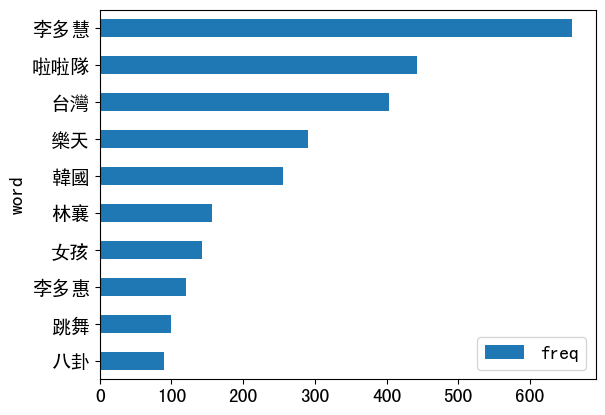

In [14]:
#查看詞頻前十高的詞
freq_df.iloc[:10].plot.barh(x='word', y='freq' ).invert_yaxis()
plt.show()

In [15]:
freq_dict = freq_df.set_index('word', inplace=False).to_dict()
freq_dict = freq_dict['freq']

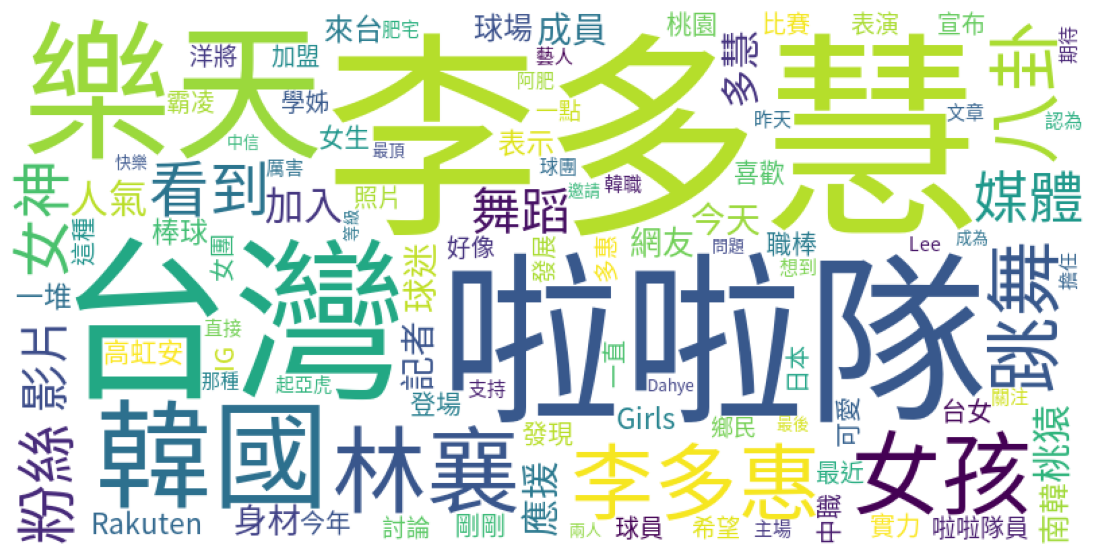

In [16]:
# 繪製文字雲
FontPath = './SourceHanSansTW-Regular.otf'
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=FontPath, max_words=100)
wordcloud.generate_from_frequencies(freq_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 上圖可以知道，在這段區間，李多慧出現的次數是最高的，除此之外還有啦啦隊、台灣、樂天、韓國、林襄等等關鍵字，推測這段期間的討論內容偏向於台灣跟韓國啦啦隊之間的比較，尤其是拿李多慧跟林襄相比，也會想知道後面會不會發生甚麼戲劇性的情節或八卦，畢竟中華職棒一向都是場外新聞比球賽有趣

In [17]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict = liwc_dict.drop(liwc_dict[liwc_dict.word== '樂天'].index,axis =0)
liwc_dict = liwc_dict.drop(liwc_dict[liwc_dict.word== '八卦'].index,axis =0)
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


### 這邊把樂天這個詞從情緒字典拿掉，在原本的字典中，樂天算是正向情緒，但是在這次的分析中，樂天是指李多慧來的啦啦隊球團

In [18]:
ptt_df = noStop_df.copy()
ptt_df["artDate"] = pd.to_datetime(ptt_df["artDate"])
#把日期字串轉成時間物件

In [19]:
ptt_df["artDate"] = ptt_df["artDate"].dt.date
#只取日期不要時間

### 本次分析將顆粒度切為以天為單位，故把時間物件轉成日期

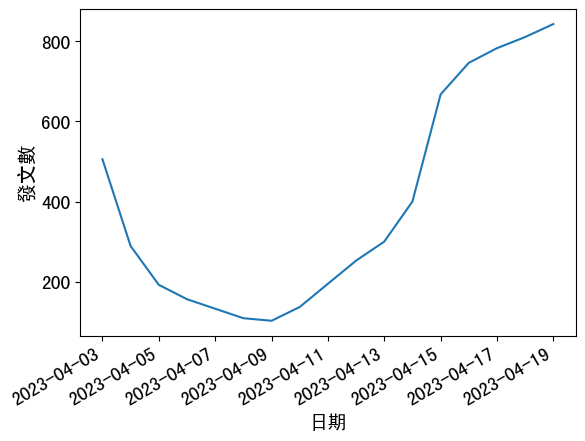

In [20]:
# 發文數
ptt_line_plot = ptt_df.groupby(["artDate"], as_index=False).size()

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_line_plot["artDate"], ptt_line_plot["size"].rolling(rolling_days).mean())
ax.set_xlabel("日期")
ax.set_ylabel('發文數')
fig.autofmt_xdate()
plt.show()

### 上圖可以看到關於李多慧的討論，在4/9的時候有一個拐點，從遞減變成遞增，因為那天是李多慧在社群網站發布了穿著樂天隊服的訪談跟舞蹈練習影片，讓鄉民有了李多慧真的要來的真實感

<iframe width="560" height="315" src="https://www.youtube.com/embed/PiWQYq6GAR0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


In [21]:
#把情緒詞跟WORD組合
ptt_liwc_df = pd.merge(ptt_df[["artDate", "artUrl", "word"]], liwc_dict, how="left")
ptt_liwc_df

,artDate,artUrl,word,sentiments
0,2023-03-17,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,KBO,NaN
1,2023-03-17,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,起亞虎,NaN
2,2023-03-17,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊長,NaN
3,2023-03-17,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,李多惠,NaN
4,2023-03-17,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,宣佈,NaN
...,...,...,...,...
20083,2023-04-19,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,我帶,NaN
20084,2023-04-19,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,著家裡,NaN
20085,2023-04-19,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,我會,NaN
20086,2023-04-19,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,李多慧,NaN


In [22]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"], dropna=False, as_index=False).size()
)
sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
0,2023-03-17,affect,234
1,2023-03-17,anger,17
2,2023-03-17,anx,11
3,2023-03-17,negative,62
4,2023-03-17,positive,146
...,...,...,...
147,2023-04-19,negative,8
148,2023-04-19,positive,19
145,2023-04-19,affect,26
146,2023-04-19,anger,2


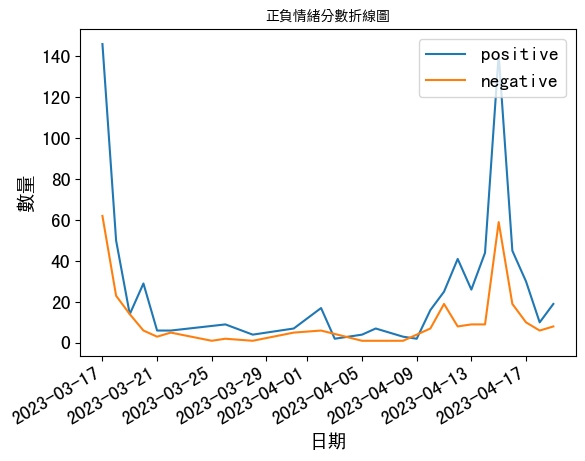

In [23]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("日期")
plt.ylabel('數量')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖", 
        fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

### 正負情緒折線圖可以看到正面情緒都大於負面，在充滿負面能量的八卦版中，對於李多慧的情緒都是正向大於負向的，~~所以說世界和平就靠她了~~

In [24]:
mask = sentiment_count['sentiments'] == 'positive'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size
4,2023-03-17,positive,146
121,2023-04-15,positive,141
11,2023-03-18,positive,50
128,2023-04-16,positive,45
115,2023-04-14,positive,44


### 上表可以發現在3/17、3/18跟4/14~16的正向情緒最高的五天。

|日期|3/17、18|4/14~16|
|-|--|---|
|原因|樂天桃猿公布李多慧加盟|李多慧在台初登板|
|連結|[新聞連結](https://monkeys.rakuten.com.tw/news_detail/571)|李多慧在台灣的第一場啦啦隊演出將是4月14日，球迷朋友可以在全猿主場見證韓國啦啦隊大物降臨，與台灣球迷的第一次近距離接觸！|

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


(-0.5, 6099.5, 8309.5, -0.5)

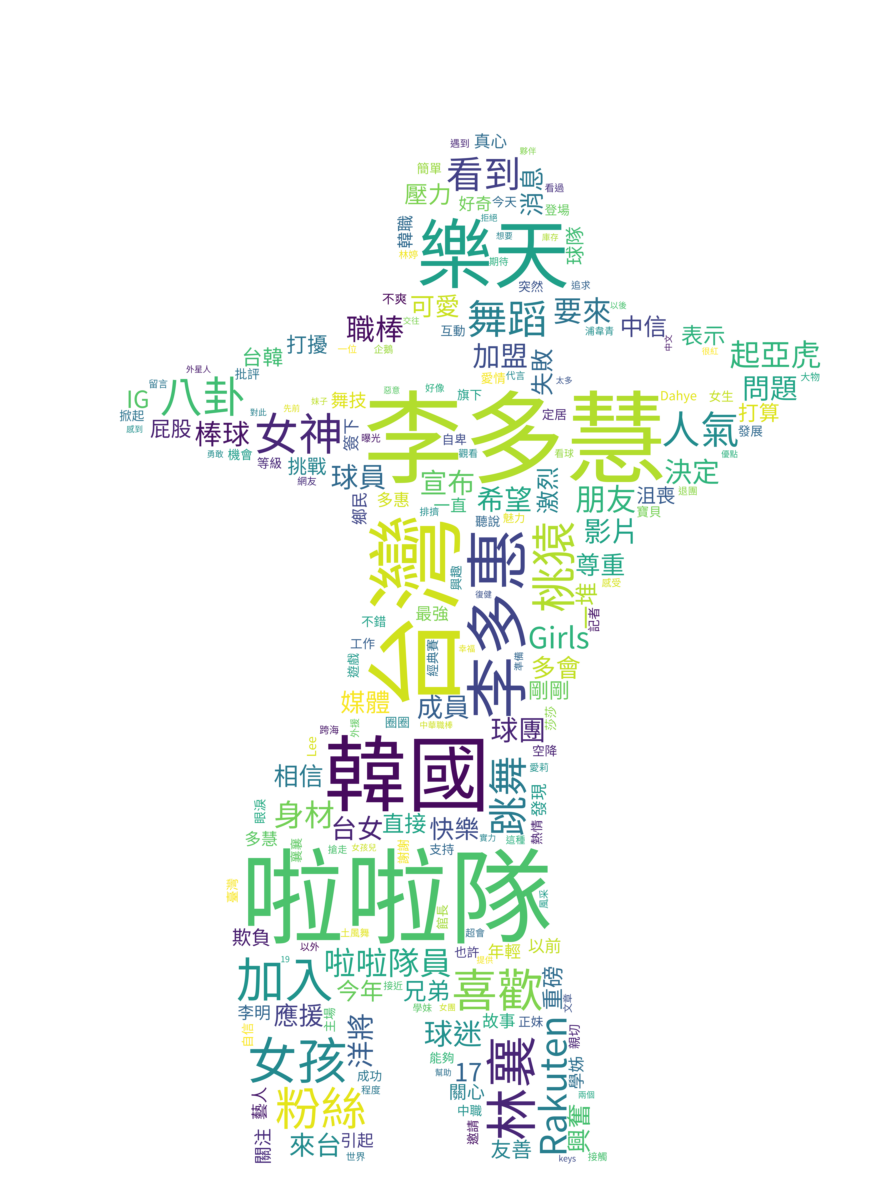

In [29]:
#date = "2023-04-17"
#mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date))
mask_1718 = ((ptt_liwc_df['artDate'] == pd.Timestamp("2023-03-17"))|
             (ptt_liwc_df['artDate'] == pd.Timestamp("2023-03-18")))
ptt_df_wc = ptt_liwc_df.loc[mask_1718, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
mask_ass = np.array(Image.open('./Leedahye.png'))

cloud = WordCloud(max_words=200, background_color="white", font_path=font_path ,mask = mask_ass,width=3200, height = 1800,scale = 10)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(20, 10), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

### 由上圖可見，在3/17、18號。討論多集中在李多慧的過往經歷和本人相關資訊上，例如曾經擔任韓國職棒球隊起亞虎的啦啦隊。還有像是"李多慧有多會"這樣的廢文、"李多慧跟艾莉莎莎鄉民會選哪個"等等的系列文出現在其中。
### 八卦版友對其表達如"可愛"、"女神"、"喜歡"、~~身材~~、~~屁股~~等正面詞彙，顯示對李多慧加盟一事的期待。

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


(-0.5, 6099.5, 8309.5, -0.5)

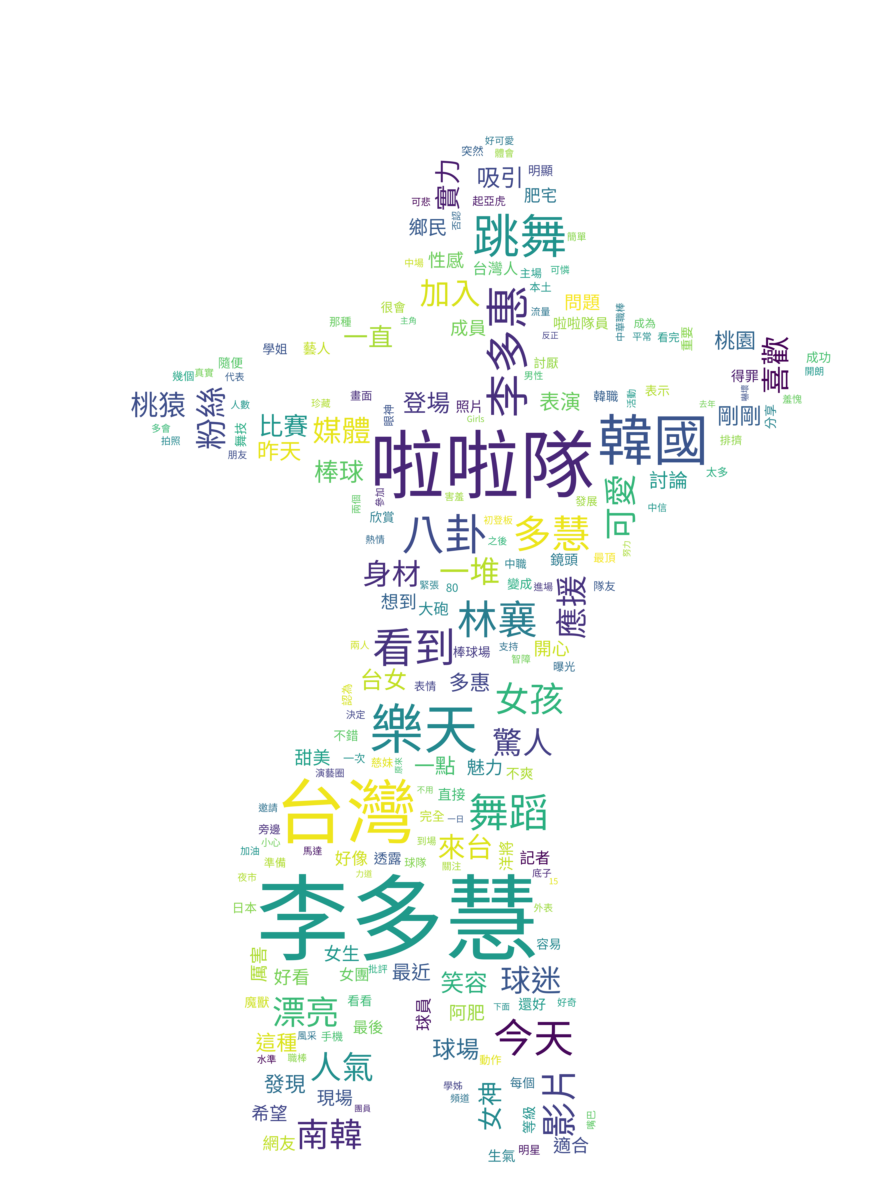

In [30]:
#date = "2023-04-17"
#mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date))
mask_141516 = ((ptt_liwc_df['artDate'] == pd.Timestamp("2023-04-14"))|
             (ptt_liwc_df['artDate'] == pd.Timestamp("2023-04-15"))|
             (ptt_liwc_df['artDate'] == pd.Timestamp("2023-04-16")))
ptt_df_wc = ptt_liwc_df.loc[mask_141516, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
mask_ass = np.array(Image.open('./Leedahye.png'))

cloud = WordCloud(max_words=200, background_color="white", font_path=font_path ,mask = mask_ass,width=3200, height = 1800,scale = 10)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(20, 10), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

### 由上圖可見，在4/14~16號，李多慧正式登板跳舞的那幾天。討論方向開始轉向"舞技"、"跳舞"、"舞蹈"、"實力"等有關李多慧的啦啦隊表演內容進行討論。<br>也出現了許多"甜美"、"漂亮"、"驚人"、"魅力"、"性感"等詞彙，顯示李多慧的初登板帶來了正面回響。


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


(-0.5, 6099.5, 8309.5, -0.5)

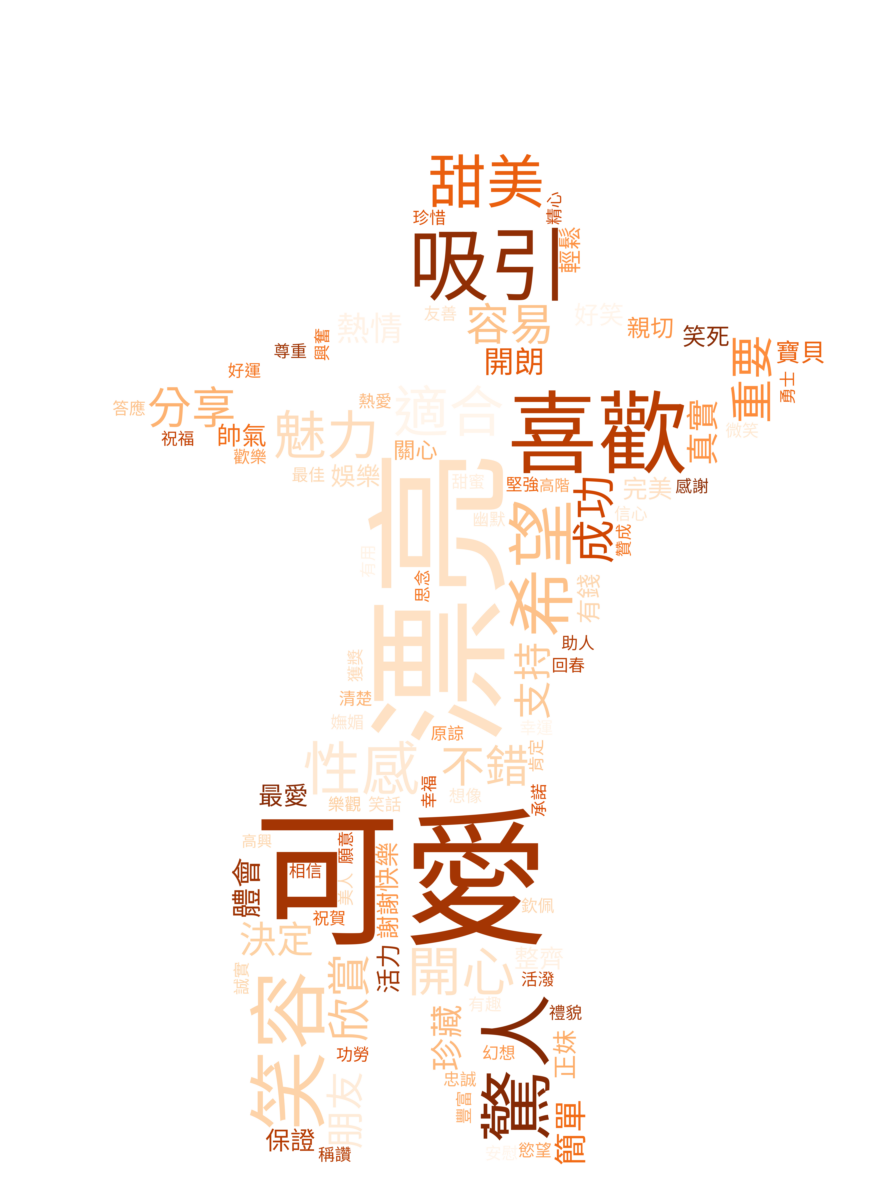

In [32]:
#date = "2023-03-17"
mask_141516_pos = ((ptt_liwc_df['artDate'] == pd.Timestamp("2023-04-14"))|
                   (ptt_liwc_df['artDate'] == pd.Timestamp("2023-04-15"))|
                   (ptt_liwc_df['artDate'] == pd.Timestamp("2023-04-16"))) & (ptt_liwc_df["sentiments"] == "positive")

ptt_df_wc = ptt_liwc_df.loc[mask_141516_pos, ["artDate", "word"]]
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()

# wordcloud 的 input 是 dictionary
font_path = "./SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", font_path=font_path ,mask = mask_ass,width=3200, height = 1800,scale = 10 ,colormap="Oranges")
cloud.generate_from_frequencies(wc)

# 繪圖
plt.figure(figsize=(20, 10), dpi=150)
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

### 查看李多慧初登板 14~16號的正面詞彙。出現了許多如"漂亮"、"甜美"、"性感"、"開朗"、"熱情"、"魅力"、"可愛"等稱讚李多慧表演內容及多慧本人的詞彙。可見李多慧在八卦板友眼中，是真的很會。

### 計算資料時間內的正負面字頻率

In [666]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

,word,sentiments,size
150,喜歡,affect,32
151,喜歡,positive,32
119,可愛,affect,30
120,可愛,positive,30
257,希望,affect,26
...,...,...,...
319,情緒,affect,1
318,悲哀,sad,1
317,悲哀,negative,1
316,悲哀,affect,1


In [667]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos

,word,sentiments,size
151,喜歡,positive,32
120,可愛,positive,30
258,希望,positive,26
403,支持,positive,23
305,快樂,positive,18
...,...,...,...
354,才華,positive,1
349,成就,positive,1
345,戀愛,positive,1
337,慾望,positive,1


In [668]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg

,word,sentiments,size
141,問題,negative,18
727,隨便,negative,11
746,驚人,negative,10
445,欺負,negative,9
289,得罪,negative,7
...,...,...,...
308,怕生,negative,1
326,惡意,negative,1
322,惡名昭彰,negative,1
320,情緒,negative,1


C:\Users\TSH13\AppData\Local\Temp/ipykernel_12364/1027879599.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
C:\Users\TSH13\AppData\Local\Temp/ipykernel_12364/1027879599.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(neg["word"], fontproperties=fprop)


Text(0.5, 1.0, '負向情緒總數')

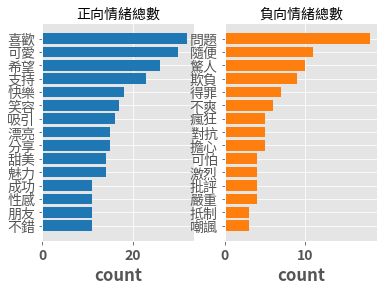

In [669]:
pos = word_of_pos.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]
neg = word_of_neg.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

### 正向情緒多為"喜歡"、"可愛"、"支持"、"笑容"、"漂亮"等稱讚詞彙，而負向情緒出現了"欺負"、"得罪"、"對抗"等擔心多慧被學姊欺負的詞彙。

### 接著計算情緒分數

In [35]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad
0,2023-03-17,234,17,11,62,146,19
1,2023-03-18,79,6,4,23,50,2
2,2023-03-19,30,1,2,14,14,3
3,2023-03-20,35,0,4,6,29,1
4,2023-03-21,9,0,0,3,6,0


In [36]:
# sentiment 計算方式: positive - anger - anx - negative - sad
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["anger"]
    - ptt_sentiment_value["anx"]
    - ptt_sentiment_value["negative"]
    - ptt_sentiment_value["sad"]
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad,sentiment_value
0,2023-03-17,234,17,11,62,146,19,37
1,2023-03-18,79,6,4,23,50,2,15
2,2023-03-19,30,1,2,14,14,3,-6
3,2023-03-20,35,0,4,6,29,1,18
4,2023-03-21,9,0,0,3,6,0,3


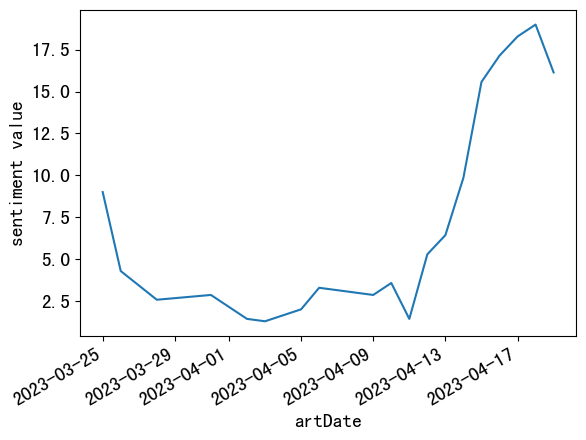

In [40]:
#7日變動線
fig, ax = plt.subplots()

rolling_days = 7
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()

### 由上圖可見，從3/17官方宣布加盟後引起討論後，發文數較少，因此情緒分數較低。後來情緒分數在4/13開始急遽上升，應是李多慧正式登板帶來的效應。

----
### 開始算TF-IDF

In [41]:
# 每篇文章的總詞彙數
total_words = word_df.groupby(['artUrl'],as_index=False).size()
total_words.rename(columns={'size': 'total'}, inplace=True)
total_words

,artUrl,total
0,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,11
1,https://www.ptt.cc/bbs/Gossiping/M.1679017272....,21
2,https://www.ptt.cc/bbs/Gossiping/M.1679018867....,36
3,https://www.ptt.cc/bbs/Gossiping/M.1679019363....,274
4,https://www.ptt.cc/bbs/Gossiping/M.1679019603....,24
...,...,...
568,https://www.ptt.cc/bbs/Gossiping/M.1681894646....,159
569,https://www.ptt.cc/bbs/Gossiping/M.1681906106....,27
570,https://www.ptt.cc/bbs/Gossiping/M.1681909607....,69
571,https://www.ptt.cc/bbs/Gossiping/M.1681913436....,31


In [42]:
# 計算各詞彙在各文章中出現的次數
word_count = word_df.groupby(['artUrl','word'],as_index=False).size()
word_count.rename(columns={'size': 'count'}, inplace=True)
word_count

,artUrl,word,count
0,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,KBO,1
1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,加入,1
2,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊,1
3,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊長,1
4,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,女孩,1
...,...,...,...
20077,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,第一,1
20078,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,網友,1
20079,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,著家裡,1
20080,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,韓國,2


In [43]:
PTT_words = word_count.merge(total_words,on = 'artUrl',how = 'left')
PTT_words

,artUrl,word,count,total
0,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,KBO,1,11
1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,加入,1,11
2,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊,1,11
3,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊長,1,11
4,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,女孩,1,11
...,...,...,...,...
20077,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,第一,1,39
20078,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,網友,1,39
20079,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,著家裡,1,39
20080,https://www.ptt.cc/bbs/Gossiping/M.1681914482....,韓國,2,39


In [44]:
# 計算tf
PTT_words_tf_idf = PTT_words.assign(tf = PTT_words.iloc[:,2]/PTT_words.iloc[:,3])
PTT_words_tf_idf.head()

,artUrl,word,count,total,tf
0,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,KBO,1,11,0.090909
1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,加入,1,11,0.090909
2,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊,1,11,0.090909
3,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊長,1,11,0.090909
4,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,女孩,1,11,0.090909


In [45]:
# 計算每個詞彙出現在幾篇文章中
idf_df = PTT_words.groupby(['word'],as_index=False).size()
PTT_words_tf_idf = PTT_words_tf_idf.merge(idf_df,on = 'word',how = 'left')
PTT_words_tf_idf.head()

,artUrl,word,count,total,tf,size
0,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,KBO,1,11,0.090909,2
1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,加入,1,11,0.090909,49
2,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊,1,11,0.090909,229
3,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊長,1,11,0.090909,5
4,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,女孩,1,11,0.090909,68


In [46]:
# 計算idf
PTT_words_tf_idf = PTT_words_tf_idf.assign(idf = PTT_words_tf_idf.iloc[:,5]
                                            .apply(lambda x: math.log((len(total_words)/x),10)))

PTT_words_tf_idf = PTT_words_tf_idf.drop(labels=['size'],axis=1)
PTT_words_tf_idf.head()

,artUrl,word,count,total,tf,idf
0,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,KBO,1,11,0.090909,2.457125
1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,加入,1,11,0.090909,1.067959
2,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊,1,11,0.090909,0.398319
3,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊長,1,11,0.090909,2.059185
4,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,女孩,1,11,0.090909,0.925646


In [47]:
# 計算tf*idf
PTT_words_tf_idf = PTT_words_tf_idf.assign(tf_idf = PTT_words_tf_idf.iloc[:,4] * PTT_words_tf_idf.iloc[:,5])
PTT_words_tf_idf.head()

,artUrl,word,count,total,tf,idf,tf_idf
0,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,KBO,1,11,0.090909,2.457125,0.223375
1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,加入,1,11,0.090909,1.067959,0.097087
2,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊,1,11,0.090909,0.398319,0.036211
3,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊長,1,11,0.090909,2.059185,0.187199
4,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,女孩,1,11,0.090909,0.925646,0.084150


In [48]:
# 選出每篇文章，tf-idf值最大的前五個詞
group = PTT_words_tf_idf.groupby("artUrl").apply(lambda x : x.nlargest(5, "tf_idf"))

In [49]:
group.loc[:,["word","tf_idf"]][0:15]

word    tf_idf
artUrl                                                               
https://www.ptt.cc/bbs/Gossiping/M.1679016963.A... 0    KBO  0.223375
                                                   5     宣佈  0.223375
                                                   3   啦啦隊長  0.187199
                                                   9    起亞虎  0.146548
                                                   8     樂天  0.115924
https://www.ptt.cc/bbs/Gossiping/M.1679017272.A... 19    最頂  0.145496
                                                   11  YUKI  0.131341
                                                   23    破千  0.131341
                                                   28   震撼彈  0.131341
                                                   29    靠邊  0.131341
https://www.ptt.cc/bbs/Gossiping/M.1679018867.A... 49    球員  0.082189
                                                   30    下降  0.076615
                                                   37    大幅  0.076615
                                                   45   棒球版  0.076615
                                                   56    自請  0.076615

In [92]:
# 從每篇文章挑選出tf-idf最大的前十個詞
(PTT_words_tf_idf.groupby("artUrl").apply(lambda x : x.nlargest(10, "tf_idf")).reset_index(drop=True)
# 計算每個詞被選中的次數
.groupby(['word'],as_index=False).size()
).sort_values('size', ascending=False).head(8) # 排序看前八名

,word,size
2319,李多慧,22
2318,李多惠,18
3783,韓國,13
1439,女孩,13
2380,樂天,13
1171,啦啦隊,13
2345,林襄,13
2145,新聞,11


### 從tf-idf值最高的字中可以看出，李多慧(李多惠)作為主角，自然是這些文章中最重要的字。而相關的像是"韓國"、"樂天女孩"、"啦啦隊"等字也是討論重點。而"林襄"作為目前樂天啦啦隊中最常被拿出來討論的對象，在和李多惠相關的討論中，也有相當重要的地位。~~大家都想看李多慧跟林襄正面對決~~

### 透過N-gram觀察詞彙
#### bigram

In [51]:
# 設定 bigram 斷詞 function
def bigram_getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopwords and len(w)>1]
    seg_list = ngrams(seg_list, 2)
    seg_list = [" ".join(w) for w in list(seg_list)]
    return seg_list

In [52]:
PTT_bigram = sent_df.copy()

PTT_bigram["word"] = PTT_bigram.artContent.apply(bigram_getToken)
PTT_bigram = PTT_bigram.explode('word')
PTT_bigram.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,KBO 起亞虎
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,起亞虎 啦啦隊長
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,啦啦隊長 李多惠


In [53]:
# 計算每個組合出現的次數
PTT_bigram_count = PTT_bigram.groupby(["word"],as_index=False).size()
PTT_bigram_count.head()

,word,size
0,02 滿滿,1
1,03 17,1
2,03 粉絲,1
3,0330 dance,1
4,04 15,1


In [54]:
# 清除包含英文或數字的bigram組合
fb_filter = list(PTT_bigram_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
PTT_bigram_count[fb_filter].sort_values(by=['size'], ascending=False).head(10)

,word,size
7899,樂天 女孩,102
7917,樂天 桃猿,63
3290,啦啦隊 女神,56
2753,台灣 啦啦隊,54
12948,韓國 啦啦隊,47
4361,女神 李多慧,38
7890,樂天 啦啦隊,24
7269,李多慧 台灣,23
2307,加入 樂天,21
7528,李多慧 韓國,15


#### trigram

In [55]:
# 設定 trigram 斷詞 function
def trigram_getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopwords and len(w)>1]
    seg_list = ngrams(seg_list, 3)
    seg_list = [" ".join(w) for w in list(seg_list)]
    return seg_list

In [56]:
PTT_trigram = sent_df.copy()

PTT_trigram["word"] = PTT_trigram.artContent.apply(trigram_getToken)
PTT_trigram = PTT_trigram.explode('word')
PTT_trigram.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,KBO 起亞虎 啦啦隊長
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,起亞虎 啦啦隊長 李多惠
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,啦啦隊長 李多惠 宣佈


In [57]:
# 計算每個組合出現的次數
PTT_trigram_count = PTT_trigram.groupby(["word"],as_index=False).size()
# 清除包含英文或數字的trigram組合
fb_filter = list(PTT_trigram_count["word"].apply(lambda x: True if not re.search("[0-9a-zA-Z]",x) else False))
PTT_trigram_count[fb_filter].sort_values(by=['size'], ascending=False).head(10)

,word,size
3123,啦啦隊 女神 李多慧,32
12126,韓國 啦啦隊 女神,17
7621,樂天 桃猿 啦啦隊,11
2252,南韓 啦啦隊 女神,10
3218,啦啦隊 樂天 女孩,10
2134,加入 樂天 女孩,9
1301,人氣 啦啦隊 女神,8
6364,最後 文章 媒體,8
6780,李多慧 加入 樂天,7
6062,新竹市 長高 虹安,7


In [58]:
# 設定斷詞 function
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopwords and len(w)>1] # 篩選掉停用字與字元數大於1的詞彙
    return seg_list
data3 = sent_df.copy()
sen_tokens = data3.artContent.apply(getToken).tolist()


#### 重新斷詞

In [59]:
# 重新進行斷詞
data2 = sent_df.copy()
data2['word'] = data2.artContent.apply(getToken)
data2 = data2.explode('word')
word_count2 = data2.groupby(['artUrl','word'],as_index=False).size()
word_count2.rename(columns={'size': 'count'}, inplace=True)
word_count2.head(10)

,artUrl,word,count
0,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,KBO,1
1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,加入,1
2,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊,1
3,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊長,1
4,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,女孩,1
5,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,宣佈,1
6,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,李多惠,1
7,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,桃猿,1
8,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,樂天,2
9,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,起亞虎,1


In [60]:
def ngram(documents, N=2):
    ngram_prediction = dict()
    total_grams = list()
    words = list()
    Word = namedtuple('Word', ['word', 'prob'])

    for doc in documents:
        # 加上開頭和結尾 tag
        split_words = ['<s>'] + list(doc) + ['</s>']
        # 計算分子
        [total_grams.append(tuple(split_words[i:i+N])) for i in range(len(split_words)-N+1)]
        # 計算分母
        [words.append(tuple(split_words[i:i+N-1])) for i in range(len(split_words)-N+2)]
        
    total_word_counter = Counter(total_grams)
    word_counter = Counter(words)
    
    for key in total_word_counter:
        word = ''.join(key[:N-1])
        if word not in ngram_prediction:
            ngram_prediction.update({word: set()})
            
        next_word_prob = total_word_counter[key]/word_counter[key[:N-1]] #P(B|A)
        w = Word(key[-1], '{:.3g}'.format(next_word_prob))
        ngram_prediction[word].add(w)
        
    return ngram_prediction

In [61]:
# Bigram預測模型為例
bi_prediction = ngram(sen_tokens, N=2)

In [94]:
text = '樂天'
next_words = list(bi_prediction[text])
next_words.sort(key = lambda s: s[1], reverse = True)
for next_word in next_words[:5]:
    print('next word: {}, probability: {}'.format(next_word.word, next_word.prob))

next word: 女孩, probability: 0.351
next word: 桃猿, probability: 0.216
next word: 啦啦隊, probability: 0.0825
next word: 球團, probability: 0.0241
next word: </s>, probability: 0.0137


#### 透過預測模型，可以看到樂天後面出現"女孩"、"桃猿"、"啦啦隊"、"球團"等詞，符合主題。<br>確定透過bigram及trigram修正後的斷詞字典沒有問題。

In [102]:
# 使用FreqDist 取得 bigram 斷詞 與 bigram出現頻率
bigramfdist = FreqDist()
def bigram_getToken_dict(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopwords and len(w)>1]
    bigramfdist.update(ngrams(seg_list, 2))
    seg_list2 = ngrams(seg_list, 2)
    seg_list = [" ".join(w) for w in list(seg_list2)]
    return seg_list

In [103]:
PTT_bigram2 = sent_df.copy()
PTT_bigram2["word"] = PTT_bigram2.artContent.apply(bigram_getToken_dict)

In [104]:
PTT_bigram2 = PTT_bigram2.explode('word')
PTT_bigram2.head(3)

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,KBO 起亞虎
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,起亞虎 啦啦隊長
0,1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,[問卦]快訊！RKG樂天女孩重大洋將戰力補強,2023-03-17 09:36:01,tony900735,Gossiping,原KBO起亞虎啦啦隊長李多惠宣佈要加入樂天桃猿啦啦隊樂天女孩了,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""uam"", ""cmtCo...",114.137.213.28,2023-03-18 01:37:09,ptt,啦啦隊長 李多惠


In [139]:
# 建立bigram和count的dictionary
# 這裡取最多的前50項
d = {k:v for k,v in bigramfdist.most_common(50)}

In [140]:
# Create network plot 
G = nx.Graph()

# 建立 nodes 間的連結
for k, v in [d][0].items():
    G.add_edge(k[0], k[1], weight=v)
    
# 取得edge權重
weights = [w[2]['weight']*0.01 for w in  G.edges(data=True)]

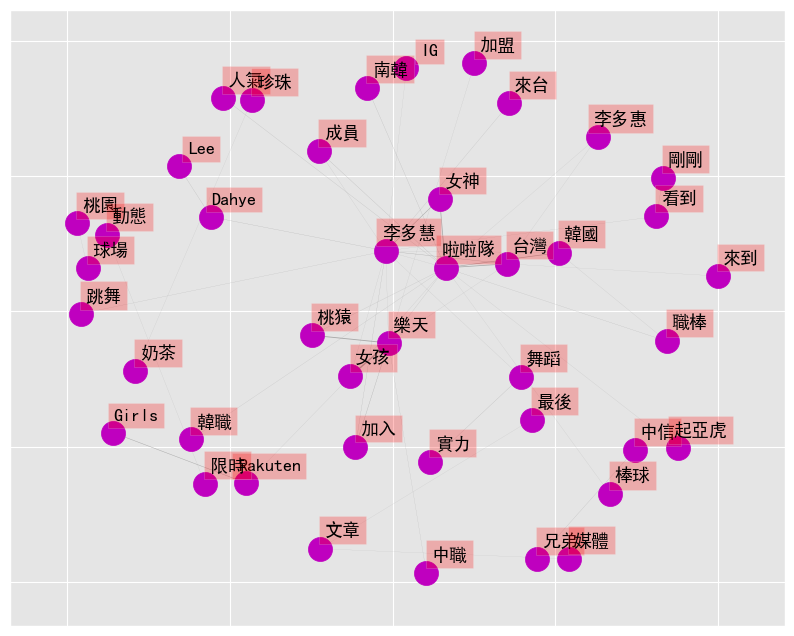

In [156]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                font_size=16,
                width=weights,
                edge_color='darkgray',
                node_color='m',
                with_labels = False,
                ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

#### 透過共現圖，我們發現除了李多慧加盟中職的相關詞彙外，也有出現其他球團的名稱。

In [150]:
# 取常一起出現的bigram pair 前1500筆
b = {k:v for k,v in bigramfdist.most_common(1500)}
# b.items()

In [149]:
# 建立DataFrame
bigram_df = pd.DataFrame(list(b), columns=['word','word2']).assign(n=b.values())

In [148]:
# 每個bigram組合的次數
bigram_df.head()

,word,word2,n,cor
0,樂天,女孩,102,0.518592
1,樂天,桃猿,63,0.488625
2,啦啦隊,女神,56,0.285988
3,台灣,啦啦隊,54,0.263900
4,韓國,啦啦隊,47,0.296004


In [151]:
#計算phi值
def phi_cor(df2):
    # total x
    nx = len(set(word_count2[word_count2["word"]==df2["word"]]["artUrl"]))
    tnx = len(df)-nx
    # total y
    ny = len(set(word_count2[word_count2["word"]==df2["word2"]]["artUrl"]))
    tny = len(df)-ny
    # 有x 有y
    x_ls = list(word_count2[word_count2["word"]==df2["word"]]["artUrl"]) #單獨有x
    y_ls = list(word_count2[word_count2["word"]==df2["word2"]]["artUrl"]) #單獨有y
    nxy = len(set(x_ls)&set(y_ls)) #取交集
    # 有x 沒有y
    nxo = nx-nxy
    # 沒有x 沒有y
    uxy = set(x_ls)|set(y_ls) #取聯集
    noo = len(set(list(df["artUrl"]))-uxy) #取差集:全-有x有y
    # 沒有x 有y
    noy = ny-nxy
    # print(nx,ny,tny,tnx,nxy,noo,nxo,noy)
    phi = (nxy*noo-nxo*noy)/math.sqrt(nx*ny*tny*tnx)
    
    return phi

In [152]:
# 詞彙在各文章中出現的次數
word_count2.head()

,artUrl,word,count
0,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,KBO,1
1,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,加入,1
2,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊,1
3,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,啦啦隊長,1
4,https://www.ptt.cc/bbs/Gossiping/M.1679016963....,女孩,1


In [153]:
bigram_df["cor"] = bigram_df.apply(phi_cor, axis=1)
bigram_df = bigram_df[bigram_df["word"]!=bigram_df["word2"]]

In [154]:
bigram_df.head()

,word,word2,n,cor
0,樂天,女孩,102,0.518592
1,樂天,桃猿,63,0.488625
2,啦啦隊,女神,56,0.285988
3,台灣,啦啦隊,54,0.263900
4,韓國,啦啦隊,47,0.296004


### 而我們挑出在李多慧來台前，樂天女孩的頭牌--林襄，和李多慧進行比較，觀察這段時間與兩位相關性最高的詞彙。

In [118]:
ice_sum = bigram_df[(bigram_df["word"]=="林襄")].sort_values(by=['cor'], ascending = False).head(10)
taste_sum = bigram_df[(bigram_df["word"]=="李多慧")].sort_values(by=['cor'], ascending = False).head(10)

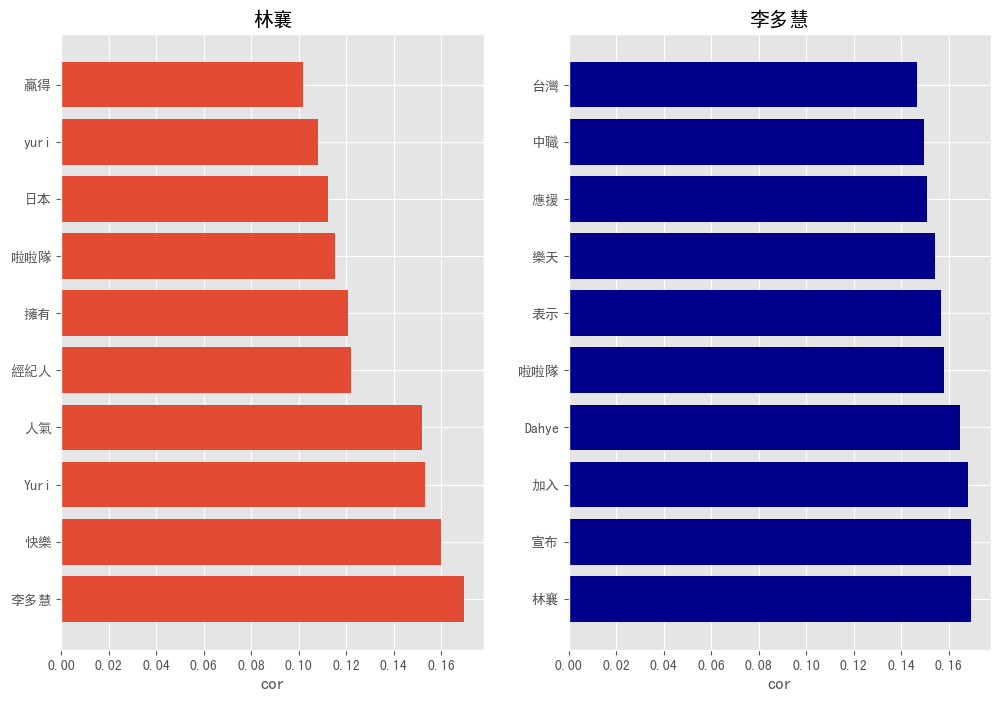

In [119]:
plt.figure(figsize=(12,8))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式

plt.subplot(121)
plt.title('林襄')
plt.xlabel('cor')
plt.barh(ice_sum['word2'],ice_sum['cor'])

plt.subplot(122)
plt.title('李多慧')
plt.xlabel('cor')
plt.barh(taste_sum['word2'],taste_sum['cor'],color="darkblue")


plt.show()

### 而與兩位相關性最高的詞彙，正好是彼此的名字。看來八卦版友對兩位啦啦隊紅會擦出甚麼樣的火花相當感興趣。

#### 透過篩選相關性大於0.5的詞彙，讓我們更好觀察字詞間的關係。

In [163]:
bigram_df[bigram_df["cor"]>0.5]

,word,word2,n,cor
0,樂天,女孩,102,0.518592
6,Rakuten,Girls,33,1.000000
15,Dahye,Lee,14,0.885355
18,中信,兄弟,13,0.676521
44,珍珠,奶茶,8,1.000000
...,...,...,...,...
1453,94,巫苡,1,0.576359
1468,各國,亞洲,1,0.575363
1479,blackpink,Lisa,1,0.706500
1494,有力,但來,1,1.000000


In [164]:
word_cors = bigram_df[bigram_df["cor"]>0.5]
word_cors.reset_index(inplace=True, drop=True)

In [165]:
import networkx as nx
# Create network plot 
g = nx.Graph()

# 建立 nodes 間的連結
for i in range(len(word_cors)):
    g.add_edge(word_cors["word"][i], word_cors["word2"][i], weight=word_cors["cor"][i])
    
# 取得edge權重
weights = [w[2]['weight']*10 for w in  g.edges(data=True)]

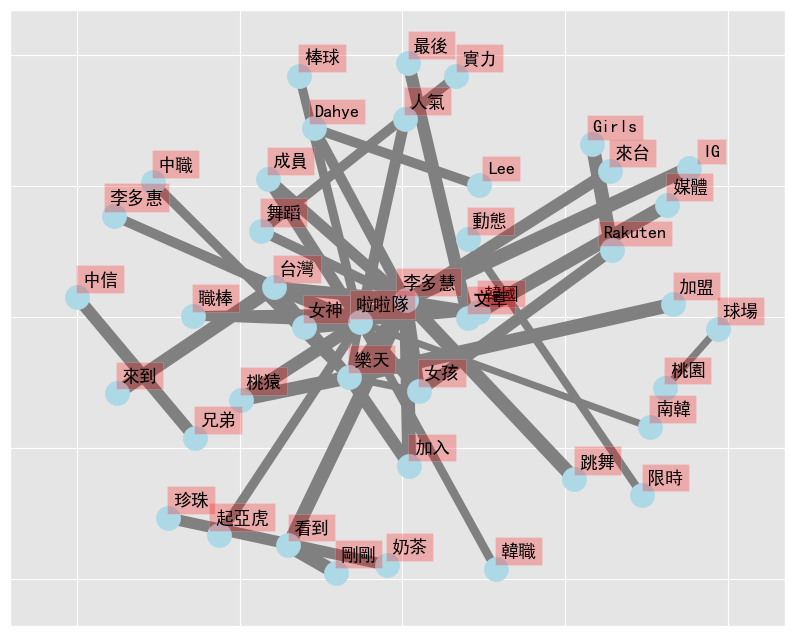

In [166]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# networks
nx.draw_networkx(G, pos,
                font_size=16,
                width=weights,
                edge_color='grey',
                node_color='lightblue',
                with_labels = False,
                ax=ax)

# 增加 labels
for key, value in pos.items():
    x, y = value[0]+.07, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

### 透過上圖，可以更明顯的看見除了李多惠相關詞之外，也出現了"中信兄弟"、"珍珠奶茶"等詞。